<a href="https://colab.research.google.com/github/Hemanthmuthyal/MLassignment/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
np.random.seed(2023)
#we will load data into our x_train,y_train,x_test,y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Data Preprocessing

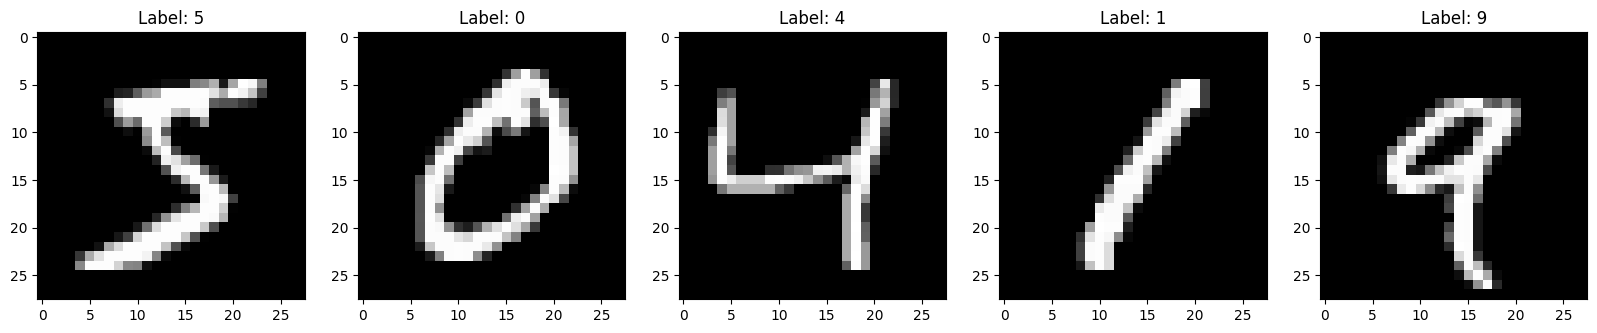

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
plt.show()


In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [5]:
x_train = x_train / 255
x_test = x_test / 255


#Model Training

Multi-Layer Perceptron (MLP)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# define the model
model1 = Sequential()
model1.add(Dense(512, input_dim=784, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

# compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 10s 20ms/step - loss: 0.2585 - accuracy: 0.9225 - val_loss: 0.0897 - val_accuracy: 0.9748
Epoch 2/10
422/422 [==============================] - 10s 23ms/step - loss: 0.1050 - accuracy: 0.9678 - val_loss: 0.0743 - val_accuracy: 0.9792
Epoch 3/10
422/422 [==============================] - 10s 23ms/step - loss: 0.0726 - accuracy: 0.9769 - val_loss: 0.0675 - val_accuracy: 0.9800
Epoch 4/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0744 - val_accuracy: 0.9797
Epoch 5/10
422/422 [==============================] - 9s 23ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0683 - val_accuracy: 0.9805
Epoch 6/10
422/422 [==============================] - 15s 35ms/step - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 7/10
422/422 [==============================] - 14s 32ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0773 - val_accuracy: 0

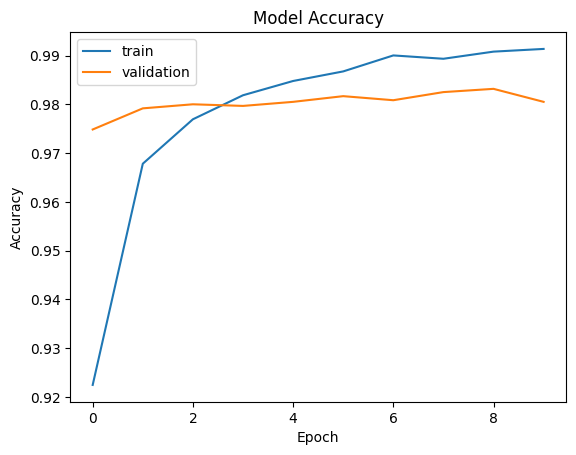

In [7]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# evaluate the model
_, test_acc = model1.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy:', test_acc)

# generate confusion matrix
y_pred = model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:', cm)


Test Accuracy: 0.9824000000953674
313/313 [==============================] - 1s 3ms/step
Confusion Matrix: [[ 973    1    0    1    0    1    1    1    1    1]
 [   0 1130    1    1    0    0    2    0    1    0]
 [   1    1 1017    4    1    0    0    6    1    1]
 [   0    0    1  997    0    4    0    4    2    2]
 [   0    0    3    0  958    0    4    5    2   10]
 [   3    0    0   15    1  858    4    1    7    3]
 [   6    2    0    1    5    2  941    0    1    0]
 [   0    1    4    1    0    0    0 1019    0    3]
 [   2    1    2    3    3    0    2    4  953    4]
 [   2    3    0    7    9    1    0    7    2  978]]


Convolutional Neural Network (CNN)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# reshape the data
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# define the model
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history2 = model2.fit(x_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 48s 110ms/step - loss: 0.2498 - accuracy: 0.9236 - val_loss: 0.0608 - val_accuracy: 0.9823
Epoch 2/10
422/422 [==============================] - 49s 115ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0537 - val_accuracy: 0.9850
Epoch 3/10
422/422 [==============================] - 49s 116ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0442 - val_accuracy: 0.9885
Epoch 4/10
422/422 [==============================] - 47s 112ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0388 - val_accuracy: 0.9897
Epoch 5/10
422/422 [==============================] - 50s 118ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0379 - val_accuracy: 0.9875
Epoch 6/10
422/422 [==============================] - 51s 121ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0336 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 47s 112ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0317 - val_ac

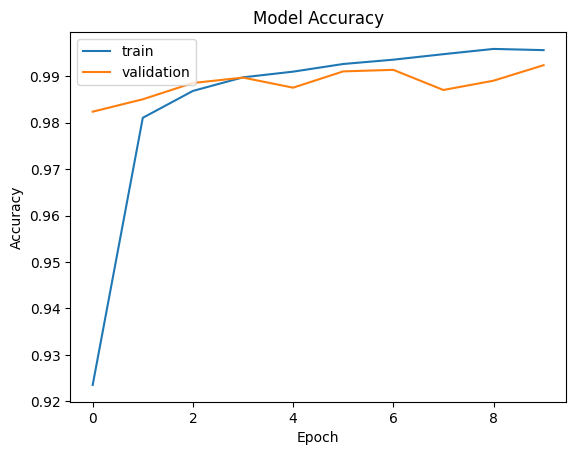

In [10]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [11]:
y_pred = model2.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

conf_mat = confusion_matrix(y_test, y_pred_classes)
print("Confusion matrix:\n", conf_mat)


313/313 [==============================] - 3s 8ms/step
Accuracy: 0.9926
Confusion matrix:
 [[ 973    0    2    0    0    0    2    2    1    0]
 [   0 1132    0    1    0    0    1    0    0    1]
 [   1    1 1019    1    1    0    3    6    0    0]
 [   0    0    1 1006    0    3    0    0    0    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    0    0    3    0  885    1    1    0    1]
 [   1    3    0    0    1    3  949    0    1    0]
 [   0    4    0    0    0    0    0 1023    1    0]
 [   2    0    3    3    0    2    0    2  959    3]
 [   1    0    0    0    3    1    1    3    0 1000]]


Recurrent Neural Network (RNN)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# reshape the data
x_train_rnn = x_train.reshape(x_train.shape[0], 28, 28)
x_test_rnn = x_test.reshape(x_test.shape[0], 28, 28)

# define the model
model3 = Sequential()
model3.add(LSTM(128, input_shape=(28, 28), activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(x_train_rnn, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 41s 92ms/step - loss: 0.7437 - accuracy: 0.7556 - val_loss: 0.1846 - val_accuracy: 0.9437
Epoch 2/10
422/422 [==============================] - 40s 95ms/step - loss: 0.1675 - accuracy: 0.9489 - val_loss: 0.1192 - val_accuracy: 0.9628
Epoch 3/10
422/422 [==============================] - 33s 79ms/step - loss: 0.1191 - accuracy: 0.9633 - val_loss: 0.0836 - val_accuracy: 0.9762
Epoch 4/10
422/422 [==============================] - 35s 82ms/step - loss: 0.0924 - accuracy: 0.9719 - val_loss: 0.0719 - val_accuracy: 0.9815
Epoch 5/10
422/422 [==============================] - 36s 85ms/step - loss: 0.0784 - accuracy: 0.9759 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 6/10
422/422 [==============================] - 33s 79ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0706 - val_accuracy: 0.9802
Epoch 7/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0613 - val_accuracy:

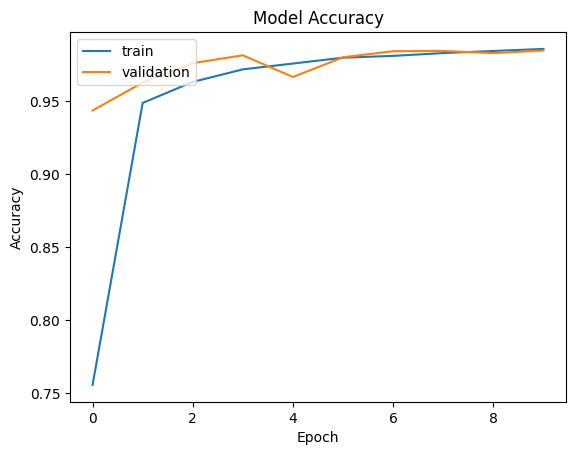

In [13]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
# evaluate the model on the test set
_, accuracy = model3.evaluate(x_test_rnn, y_test, batch_size=128)
print('Accuracy: %.2f' % (accuracy*100))

# make predictions on the test set
y_pred_prob = model3.predict(x_test_rnn, batch_size=128)
y_pred = y_pred_prob.argmax(axis=-1)

# import confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(cm)


79/79 [==============================] - 4s 53ms/step - loss: 0.0585 - accuracy: 0.9807
Accuracy: 98.07
79/79 [==============================] - 3s 38ms/step
Confusion Matrix:
[[ 973    0    1    0    3    0    0    1    2    0]
 [   0 1129    1    0    0    0    2    0    3    0]
 [   4    2 1000    9    5    0    5    6    1    0]
 [   0    0    2 1004    0    2    0    0    2    0]
 [   0    0    0    0  969    0    4    1    0    8]
 [   0    2    0    9    0  877    2    1    1    0]
 [   7    2    0    1    3    5  938    0    2    0]
 [   0    4    8   10    1    1    0  997    1    6]
 [   2    1    1    8    2    3    1    4  950    2]
 [   0    0    0    9   14    6    0    6    4  970]]


Ensemble of MLP, CNN, and RNN

In [17]:
# ensemble of MLP, CNN, and RNN
y_pred_mlp = model1.predict(x_test)
y_pred_cnn = model2.predict(x_test_cnn)
y_pred_rnn = model3.predict(x_test_rnn)
y_pred_ensemble = (y_pred_mlp + y_pred_cnn + y_pred_rnn) / 3
y_pred_classes = np.argmax(y_pred_ensemble, axis=1)
ensemble_acc = accuracy_score(y_test, y_pred_classes)
print('Ensemble Accuracy:', ensemble_acc)
cm_ensemble = confusion_matrix(y_test, y_pred_classes)
print('Ensemble Confusion Matrix:\n', cm_ensemble)



313/313 [==============================] - 4s 12ms/step
Ensemble Accuracy: 0.9916
Ensemble Confusion Matrix:
 [[ 975    0    0    0    0    0    1    1    3    0]
 [   0 1131    1    1    0    0    2    0    0    0]
 [   1    2 1023    0    1    0    1    4    0    0]
 [   0    0    0 1005    0    3    0    0    2    0]
 [   0    0    0    0  975    0    3    1    0    3]
 [   1    0    0    4    0  884    1    1    1    0]
 [   3    2    0    1    2    2  948    0    0    0]
 [   0    3    3    1    0    0    0 1021    0    0]
 [   2    0    2    1    0    0    1    3  962    3]
 [   1    1    0    3    8    1    0    3    0  992]]
